In [2]:
pip install numpy==1.26.4

  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [2]:
# Import important packages
# Standard Python & Scanpy stack
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=100, facecolor="white")
np.random.seed(42)

In [44]:
# Explicitly set figures to output directory
sc.settings.figdir = "results/figures"
# Make sure the folder exists
os.makedirs(sc.settings.figdir, exist_ok=True)
# Confirm path
print("Figure directory is set to:", sc.settings.figdir)

Figure directory is set to: results\figures


In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
#Step 1: Load the Clustered Data
adata = sc.read_h5ad("../results/anndata/clustered.h5ad")

In [8]:
#To check the adata.obs['leiden'] exists and is categorical
adata.obs['leiden'] = adata.obs['leiden'].astype('category')

In [9]:
adata.obs['leiden'].dtype

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
                  '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
                  '22', '23'],
, ordered=False, categories_dtype=object)

In [10]:
# Step 2: Identify Marker Genes for Each Cluster
sc.tl.rank_genes_groups(
    adata,
    groupby="leiden",
    method="wilcoxon",
    use_raw=True,
    pts=True
)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:15:07)


E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\tools\_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\tools\_rank_genes_groups.py:401: PerformanceWarning: DataFrame is highly fragmented.  This is 

Comparing, **wilcoxon** with others.Which is the most widely used and best suited for ranking cluster marker genes in scRNA-seq.
**Logreg** is useful if you're building a predictive model or want to distinguish complex patterns, but it's slower and less interpretable.
While, **t-test** is generally not suitable for raw or even log-transformed sparse count matrices.

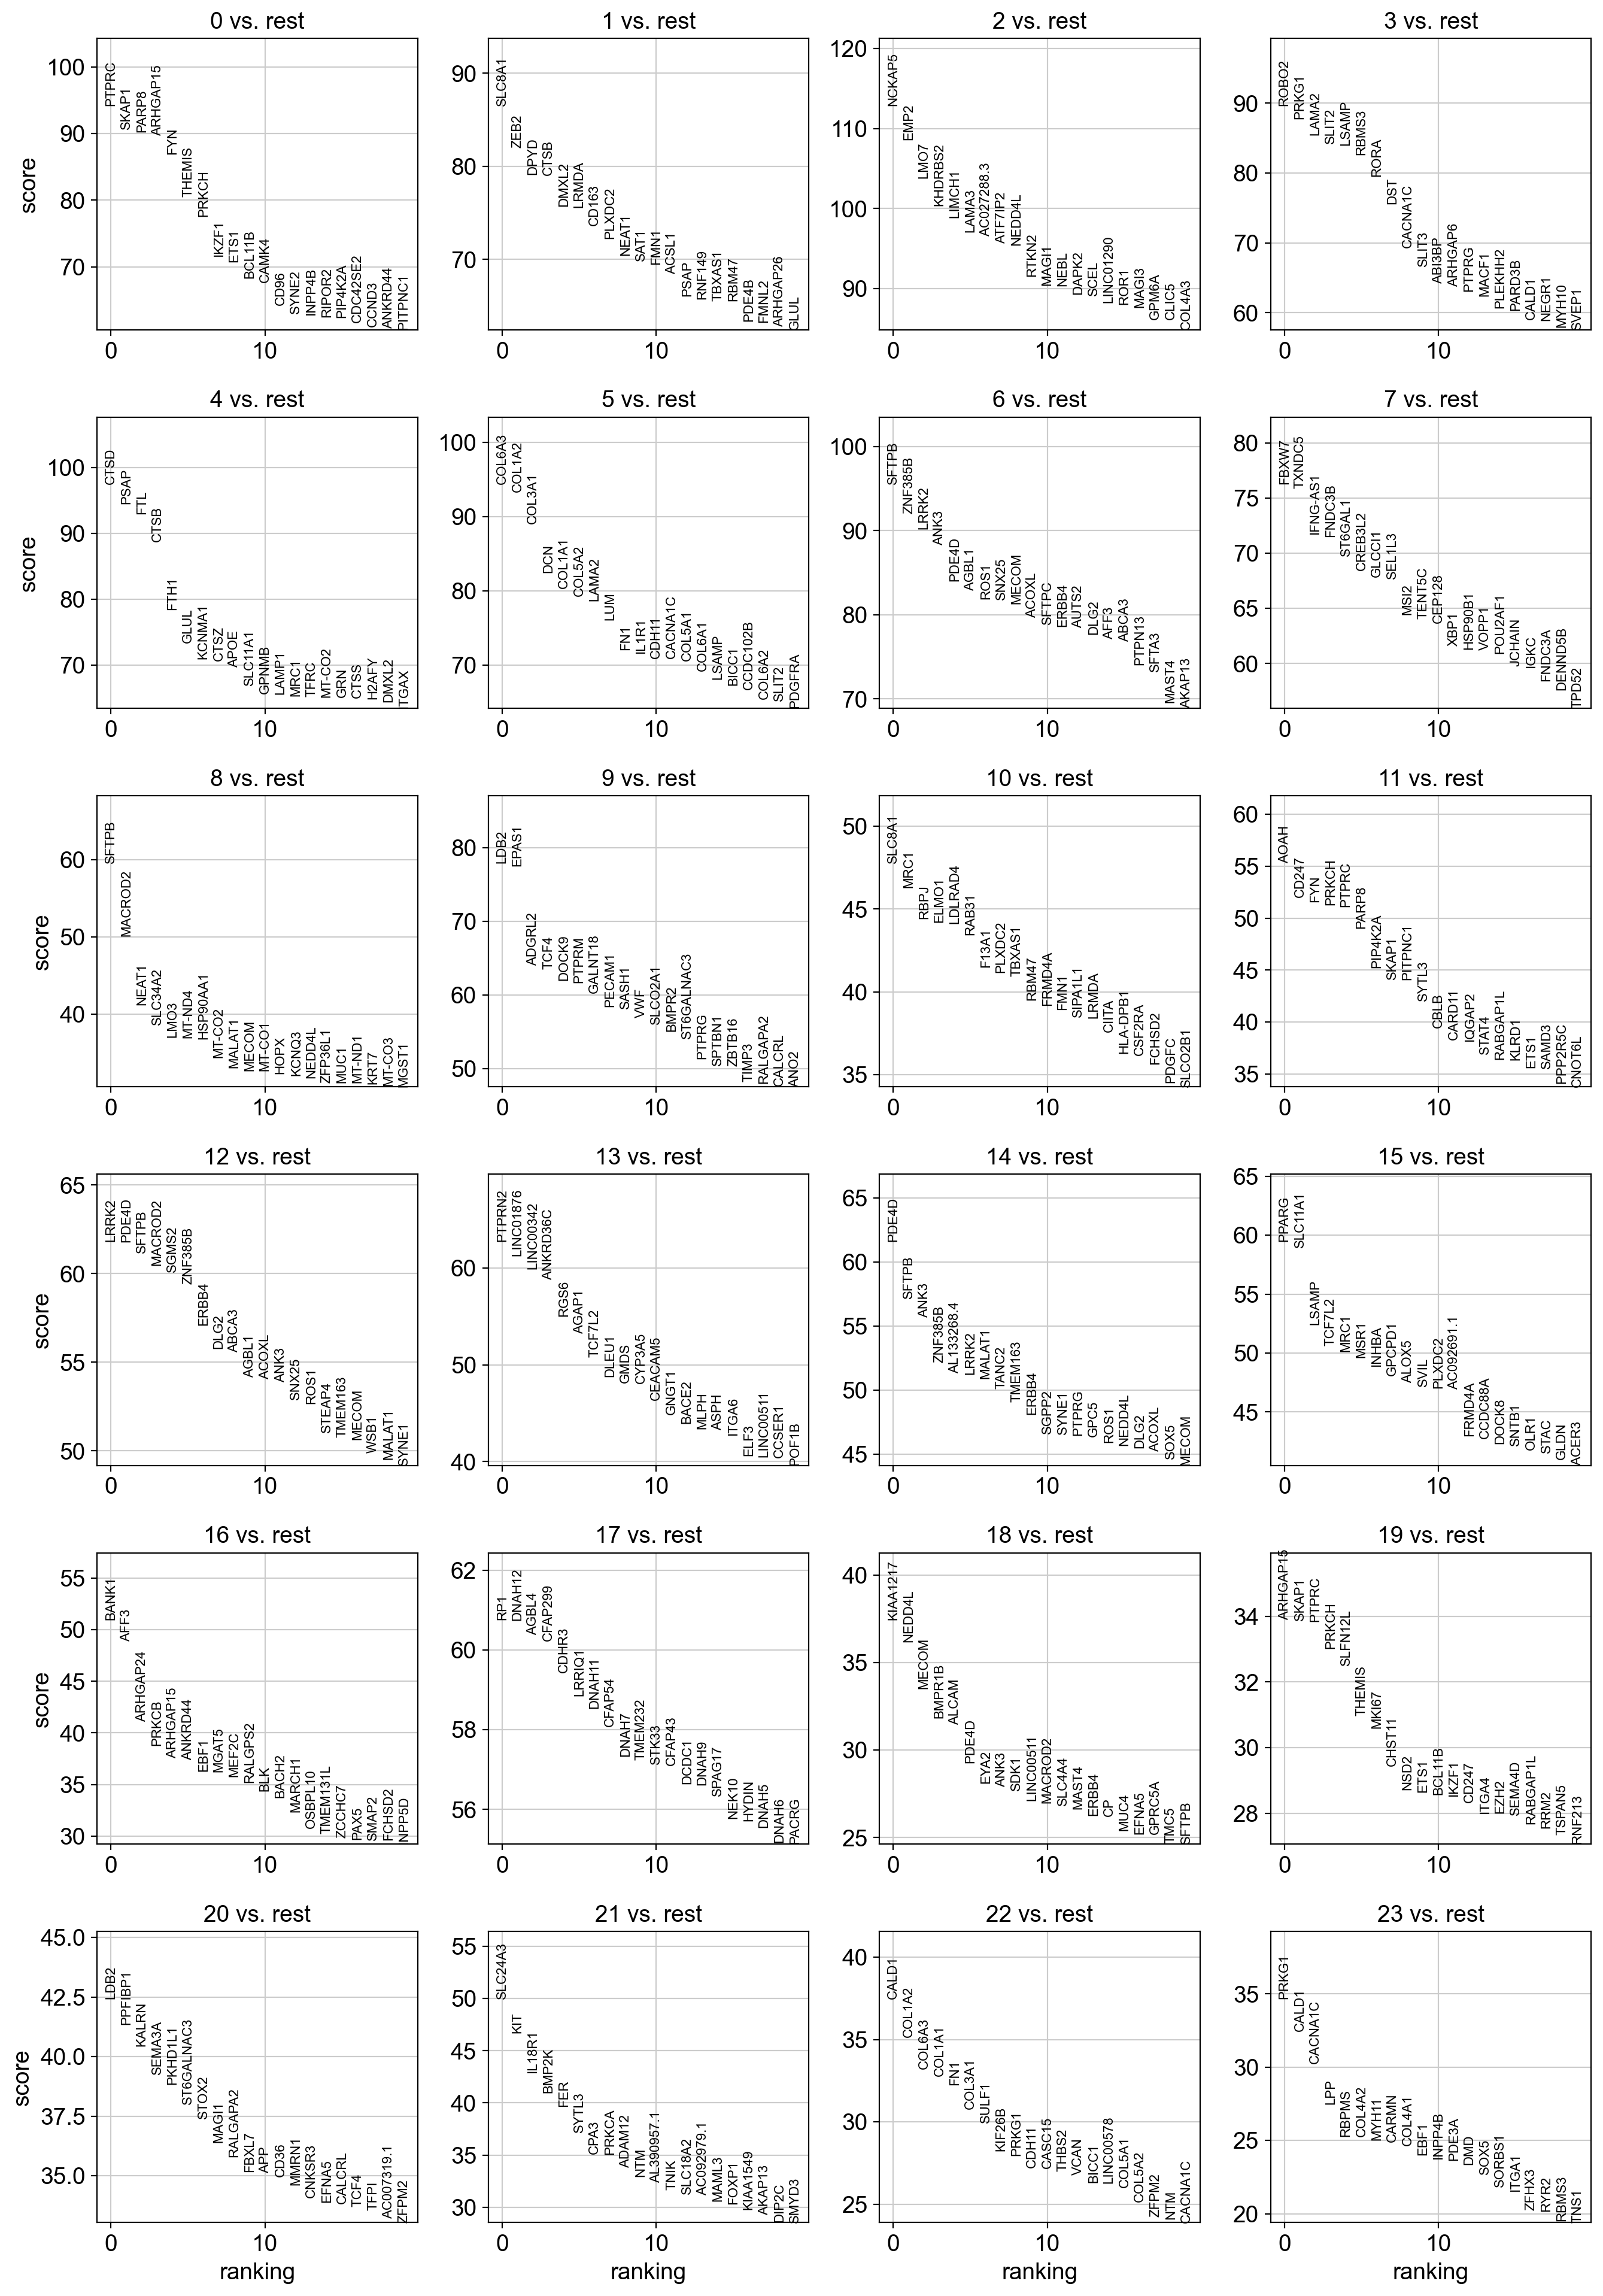

In [13]:
#Step 3: Visualize Top Marker Genes. Top genes across all clusters
#Shows plots of the top 20 genes per cluster.
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [20]:
#Step 4: Export all marker genes
df = sc.get.rank_genes_groups_df(adata, group=None)
df.to_csv("../results/ranked_markers_all_clusters.csv", index=False)

In [58]:
sc.get.rank_genes_groups_df(adata, None) # Markers with logfoldchanges

group     names     scores  logfoldchanges         pvals     pvals_adj  \
0          0     PTPRC  94.155197        4.004817  0.000000e+00  0.000000e+00   
1          0     SKAP1  90.651794        5.442446  0.000000e+00  0.000000e+00   
2          0     PARP8  90.165565        4.182425  0.000000e+00  0.000000e+00   
3          0  ARHGAP15  89.638756        3.910859  0.000000e+00  0.000000e+00   
4          0       FYN  86.857773        4.320937  0.000000e+00  0.000000e+00   
...      ...       ...        ...             ...           ...           ...   
762067    23    CHST11 -12.381222       -2.234705  3.302775e-35  1.379908e-32   
762068    23    FAM49B -12.431334       -3.150189  1.766632e-35  7.684363e-33   
762069    23     RUNX1 -12.790763       -2.174357  1.846529e-37  9.020435e-35   
762070    23     ELMO1 -12.842248       -2.726666  9.507347e-38  4.716981e-35   
762071    23     RBM47 -13.148812       -3.846933  1.728684e-39  8.998511e-37   

        pct_nz_group  pct_nz_reference  
0           0.831567          0.267032  
1           0.718019          0.071627  
2           0.765500          0.248260  
3           0.799187          0.256952  
4           0.743284          0.169844  
...              ...               ...  
762067      0.176568          0.445899  
762068      0.070957          0.355079  
762069      0.174917          0.464224  
762070      0.112211          0.400953  
762071      0.047855          0.350126  

[762072 rows x 8 columns]

For cluster 0, it expresses PTPRC strongly.
It is a good marker (high fold change, highly specific, significant p-value).
Much more frequent in cluster 0 (83%) than the rest (27%).

In [21]:
#Step 5: Filter strong marker genes.This removes weak/noisy genes.
# Filter for significant and high-effect genes:
df_filtered = df[(df.pvals_adj < 0.05) & (df.logfoldchanges > 0.5)]
df_filtered.to_csv("../results/filtered_markers.csv", index=False)

categories: 0, 1, 2, etc.
var_group_labels: 0, 1, 2, etc.


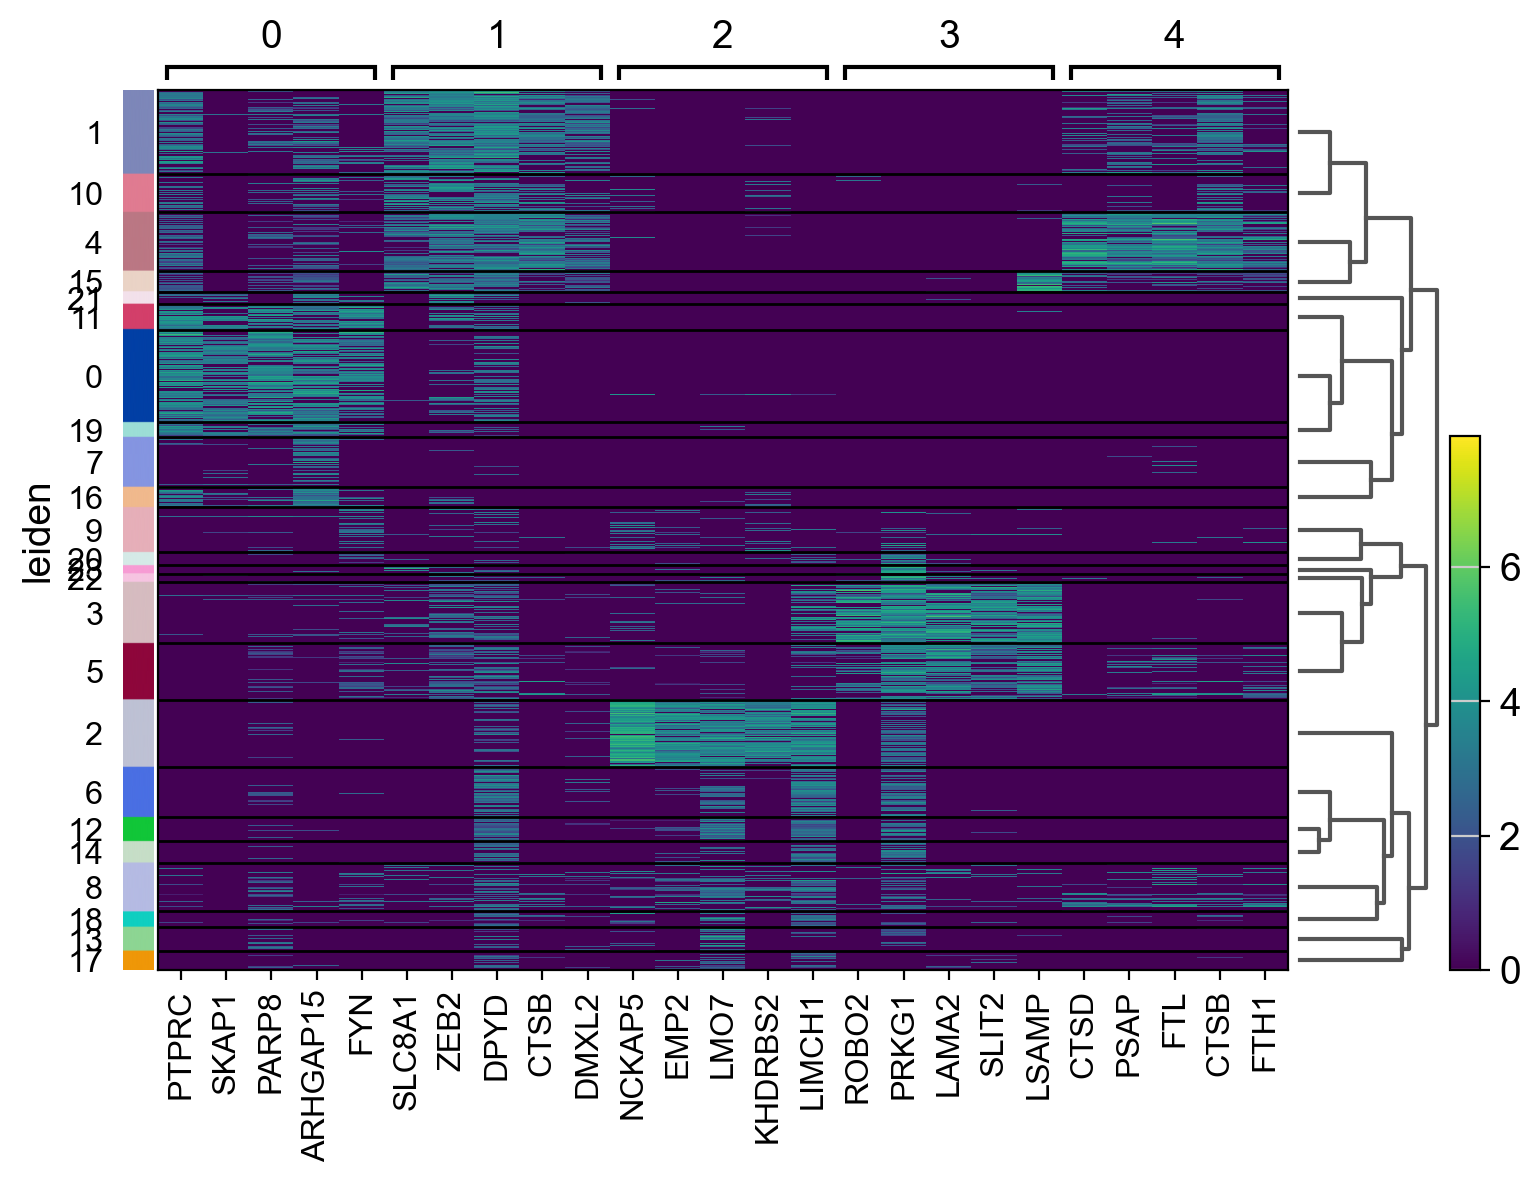

In [55]:
# Step 6: Get the matplotlib Axes object (can be single or list)
ax = sc.pl.rank_genes_groups_heatmap(
    adata,
    groups=["0", "1", "2", "3", "4"],
    n_genes=5,
    show=False,
    return_fig=True
)

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


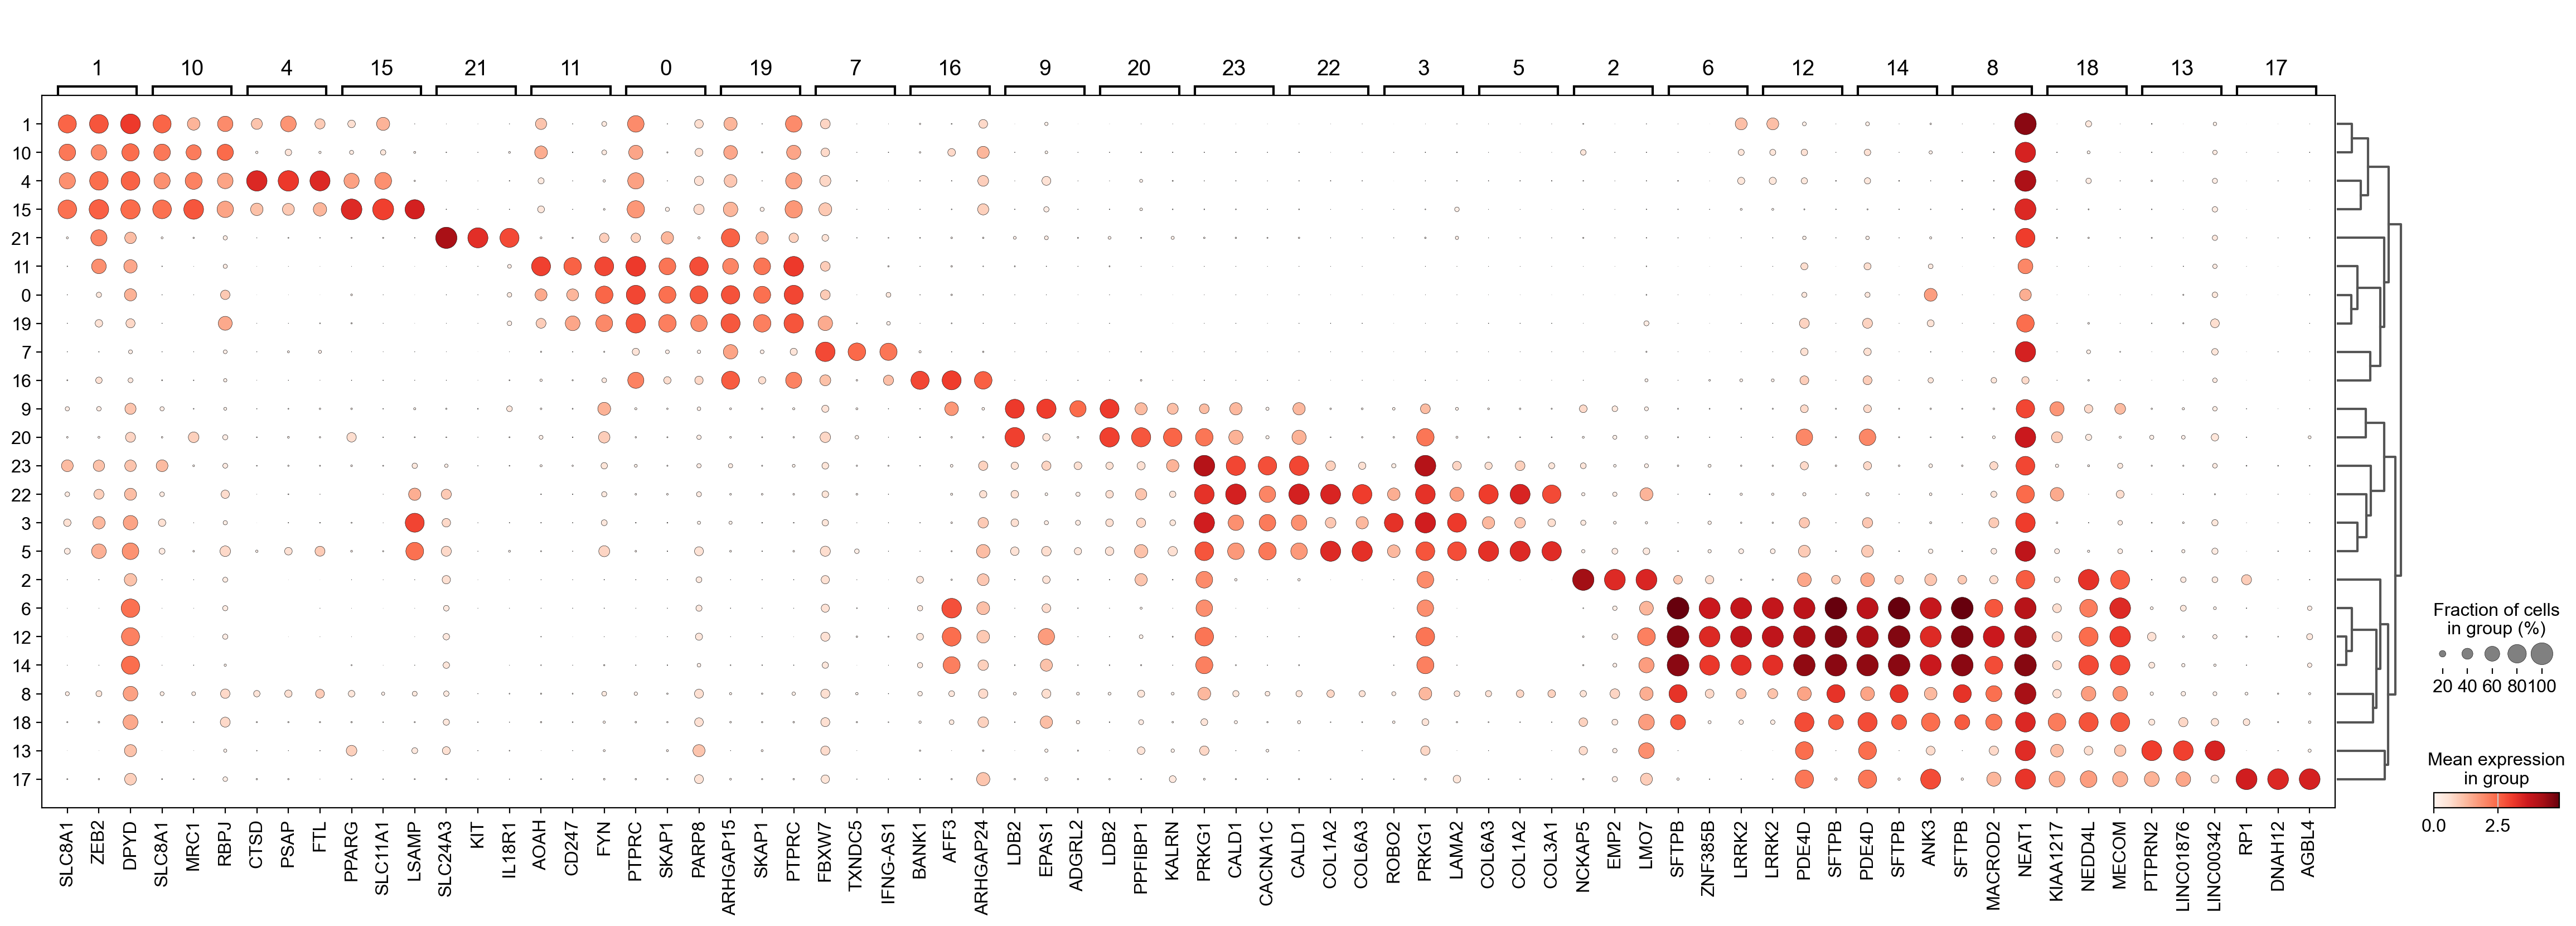

In [53]:
#Step 7: Dotplot:
sc.pl.rank_genes_groups_dotplot(adata, n_genes =3, groupby="leiden", show=True, save="_dotplot_top3.pdf")

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


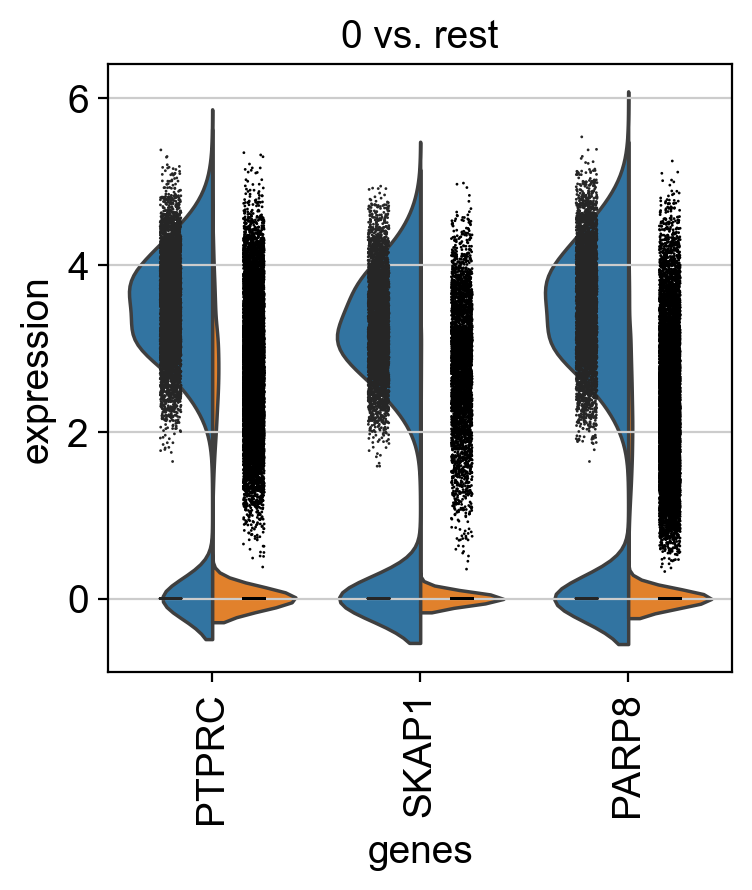

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


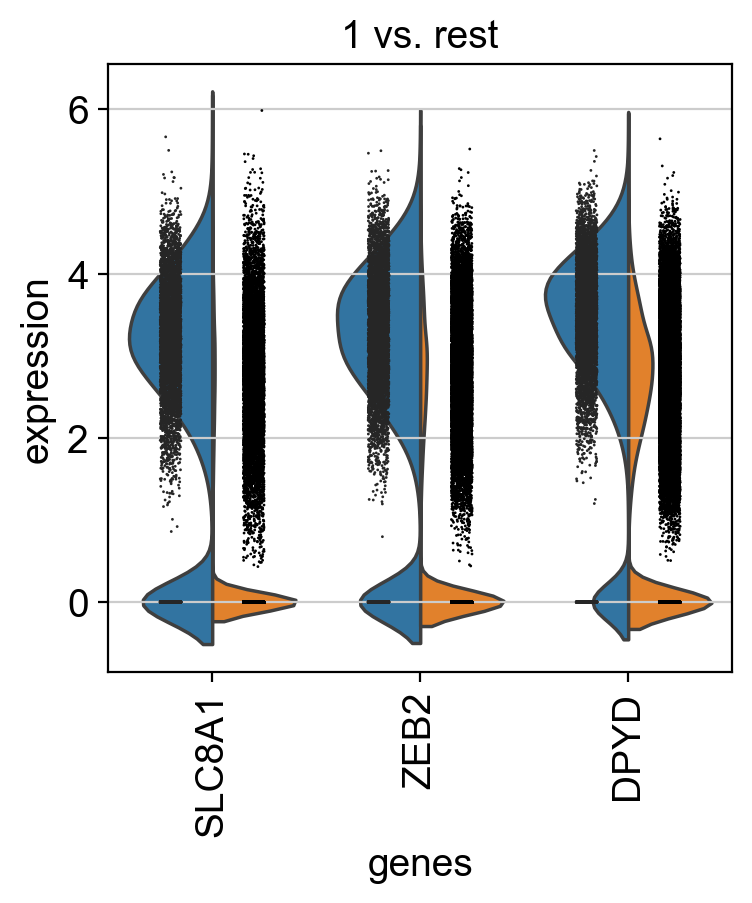

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


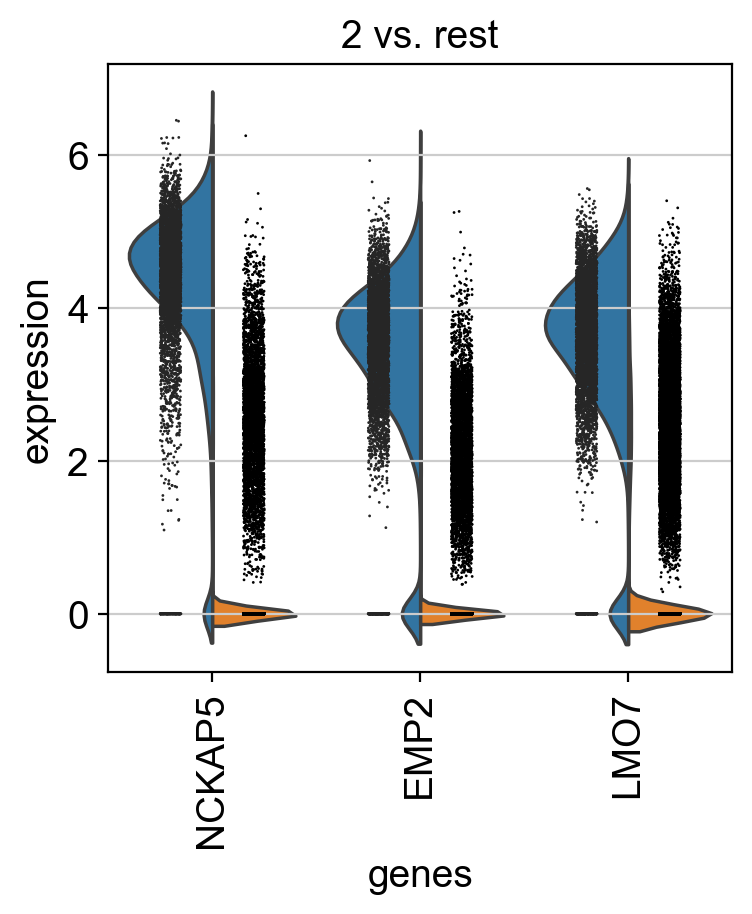

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


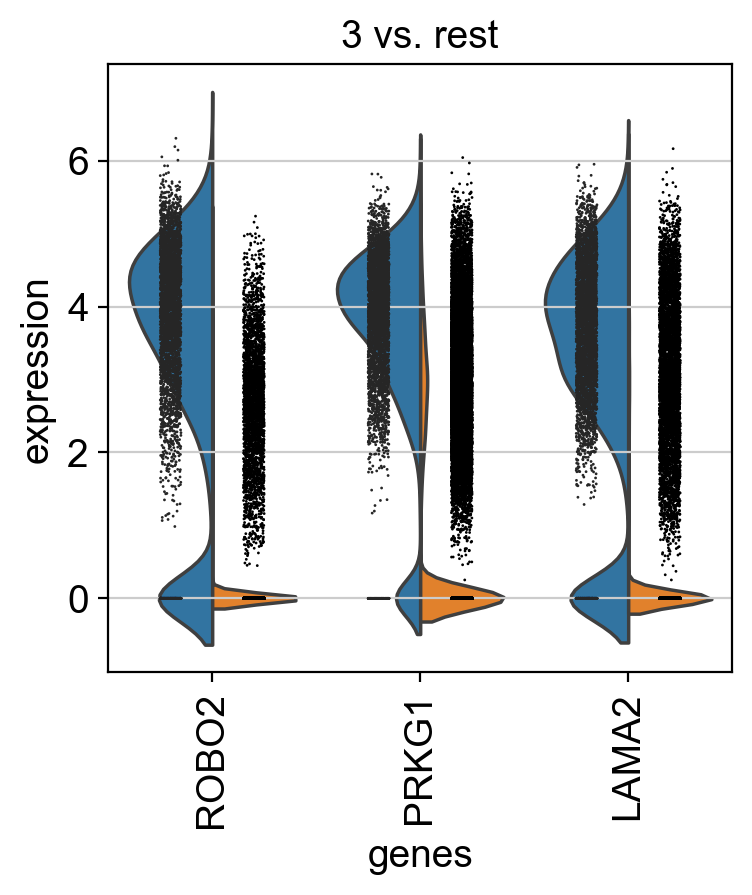

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


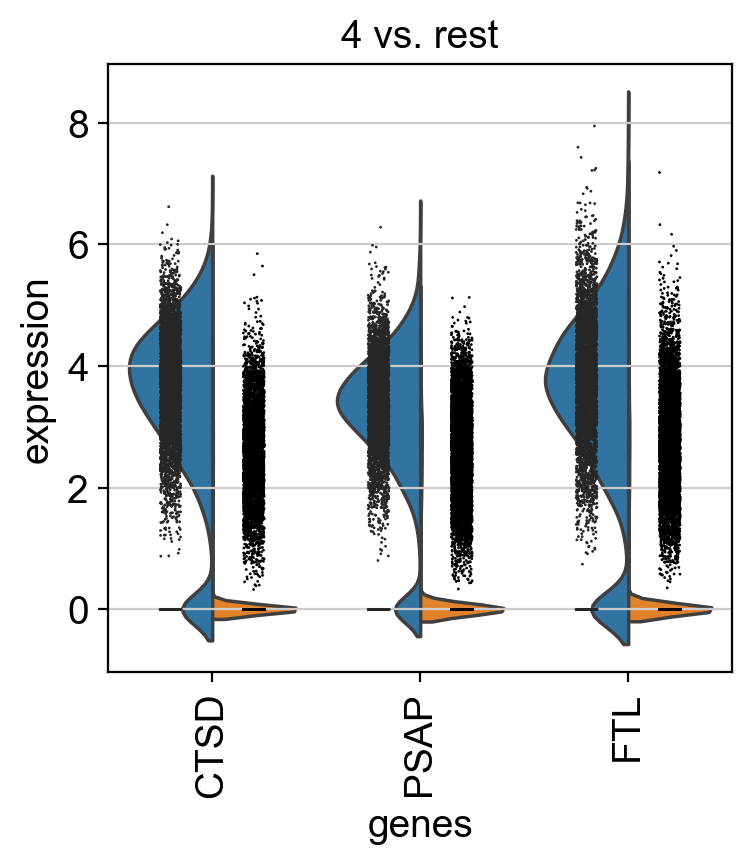

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


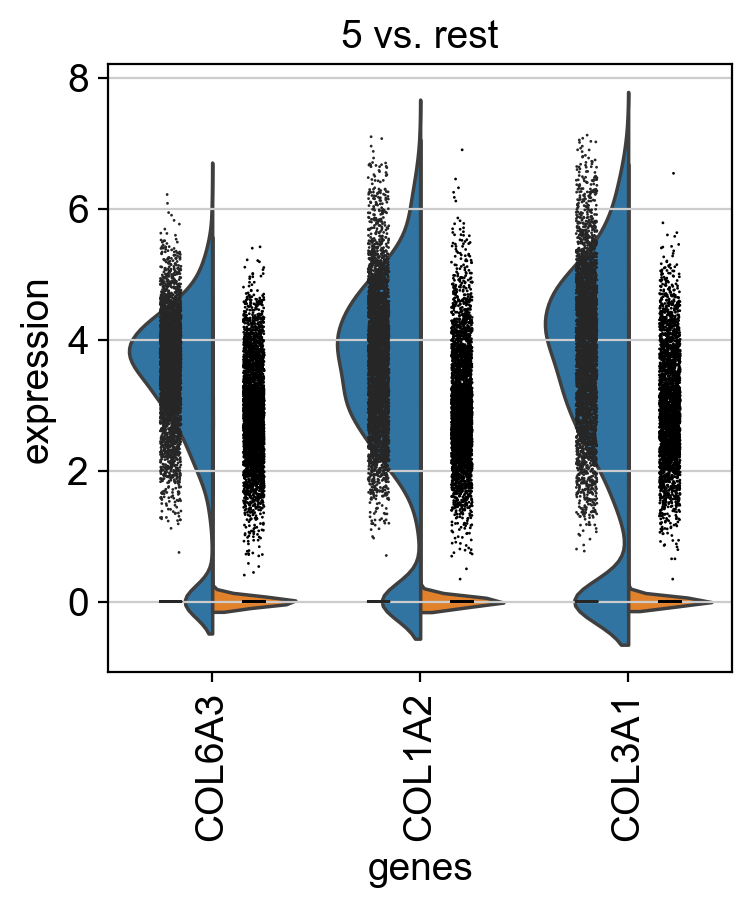

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


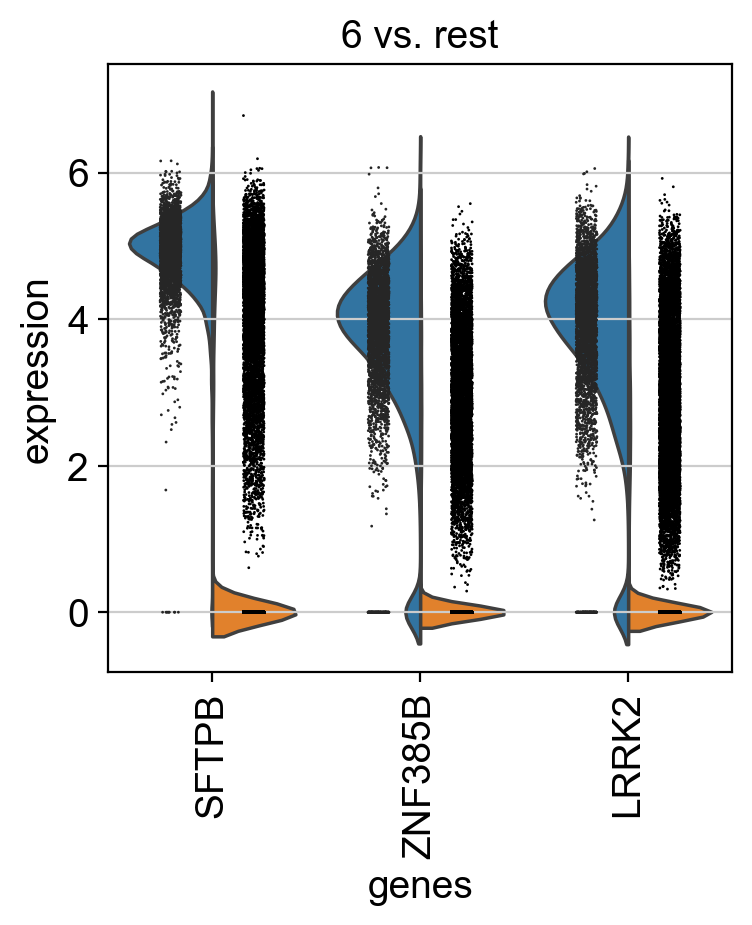

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


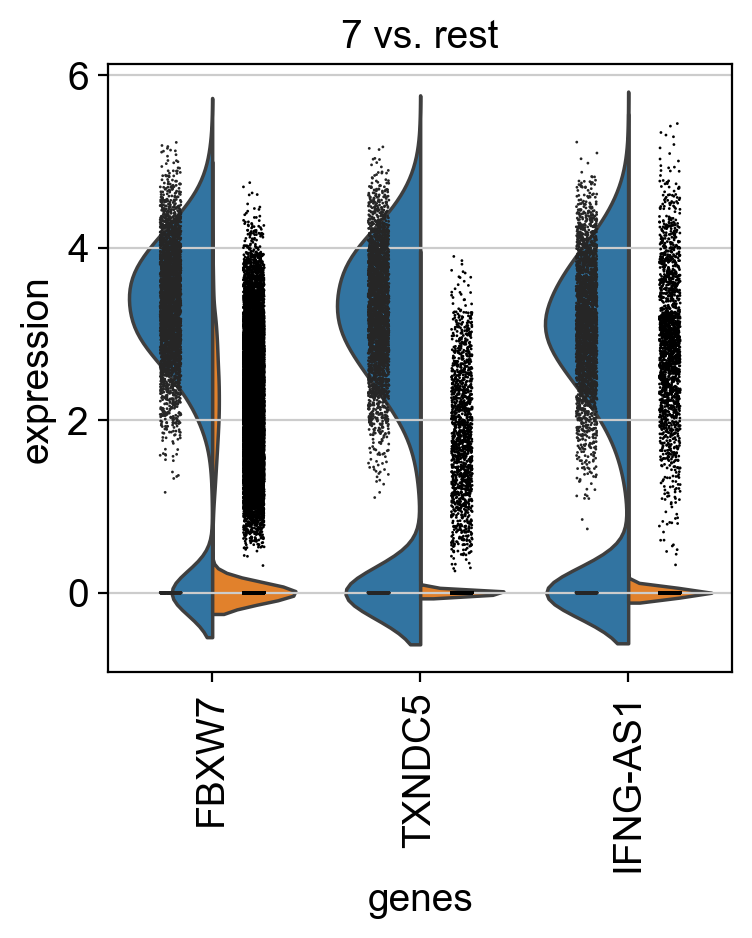

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


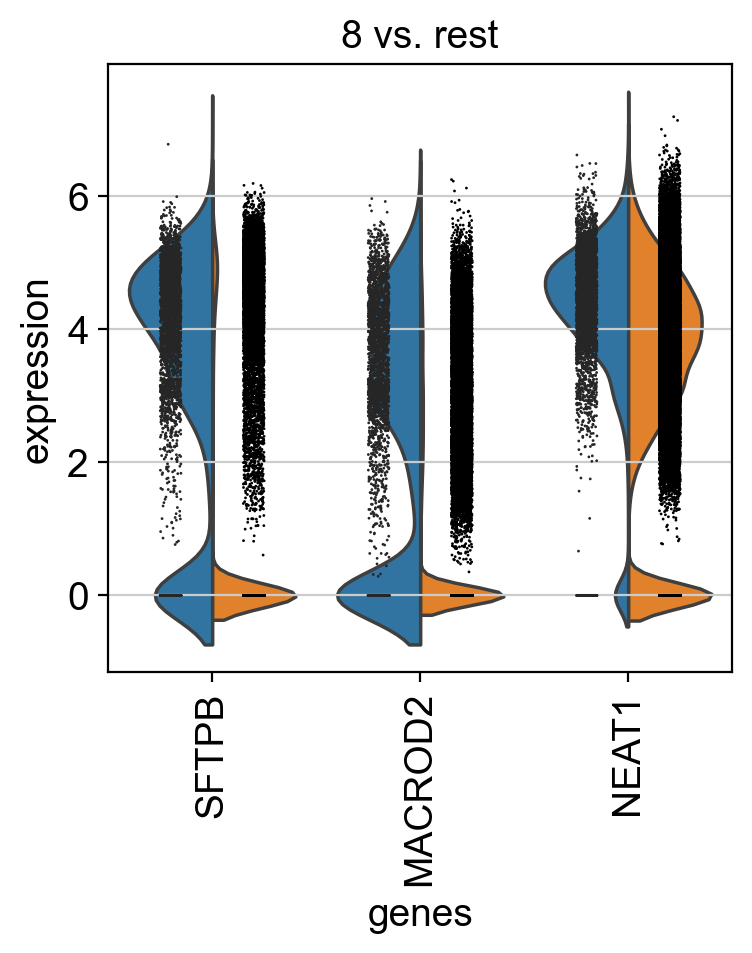

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


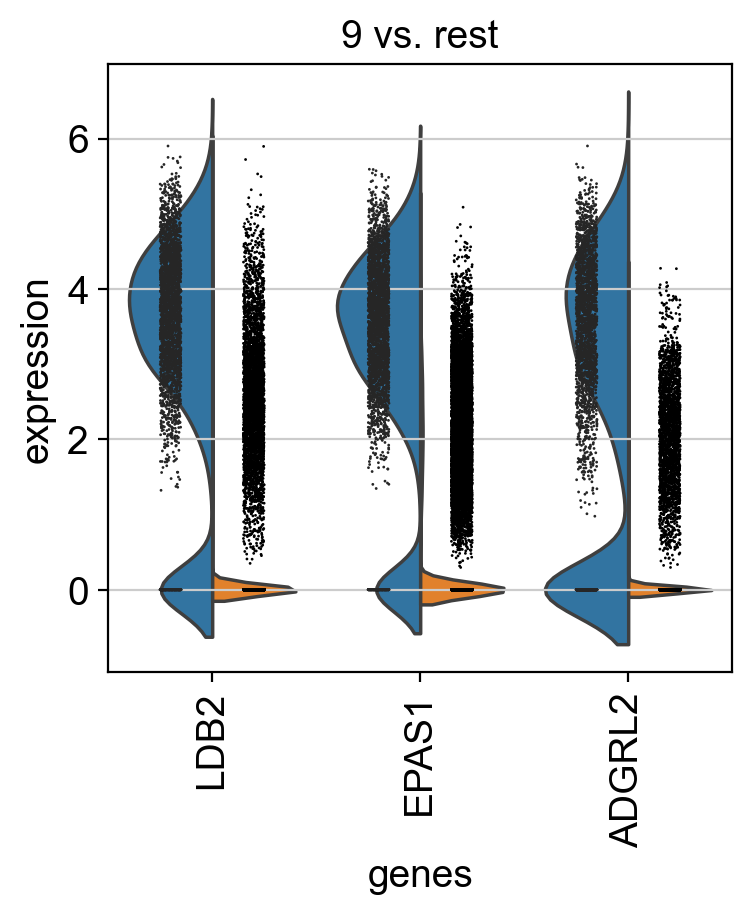

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


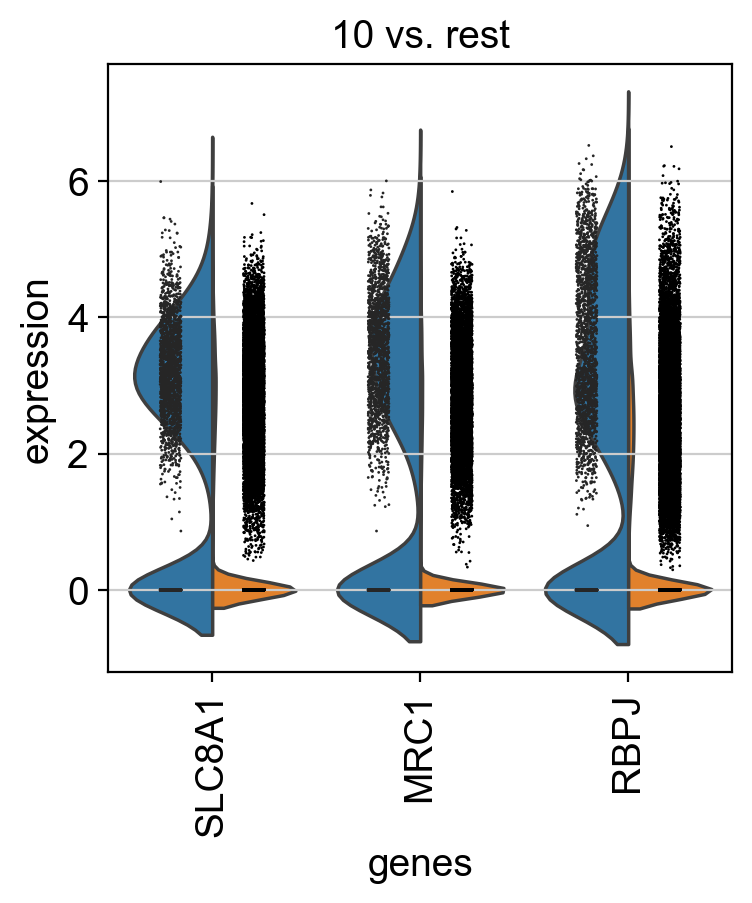

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


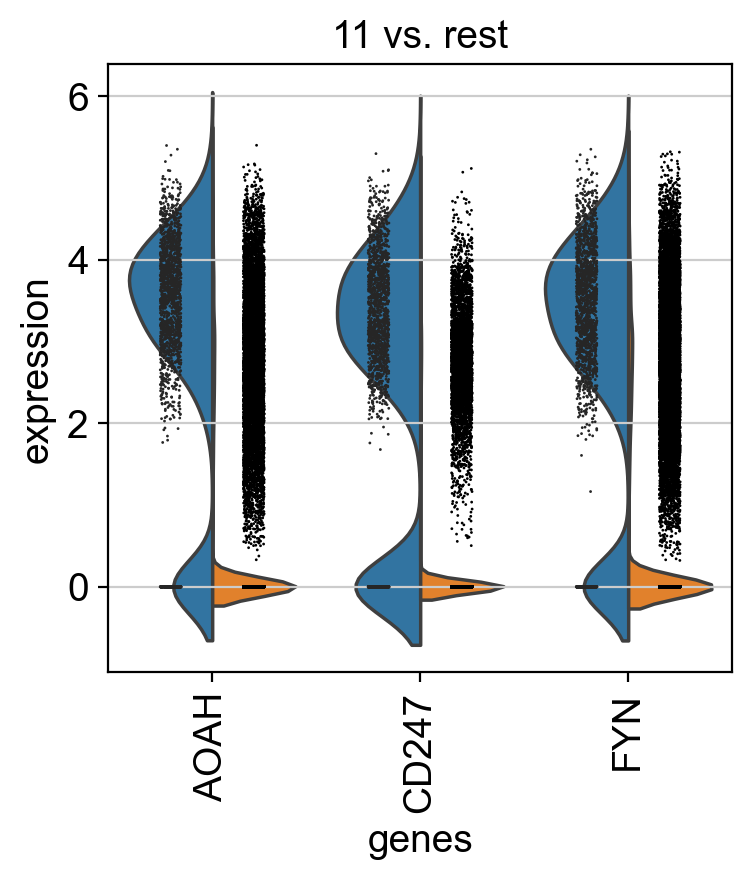

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


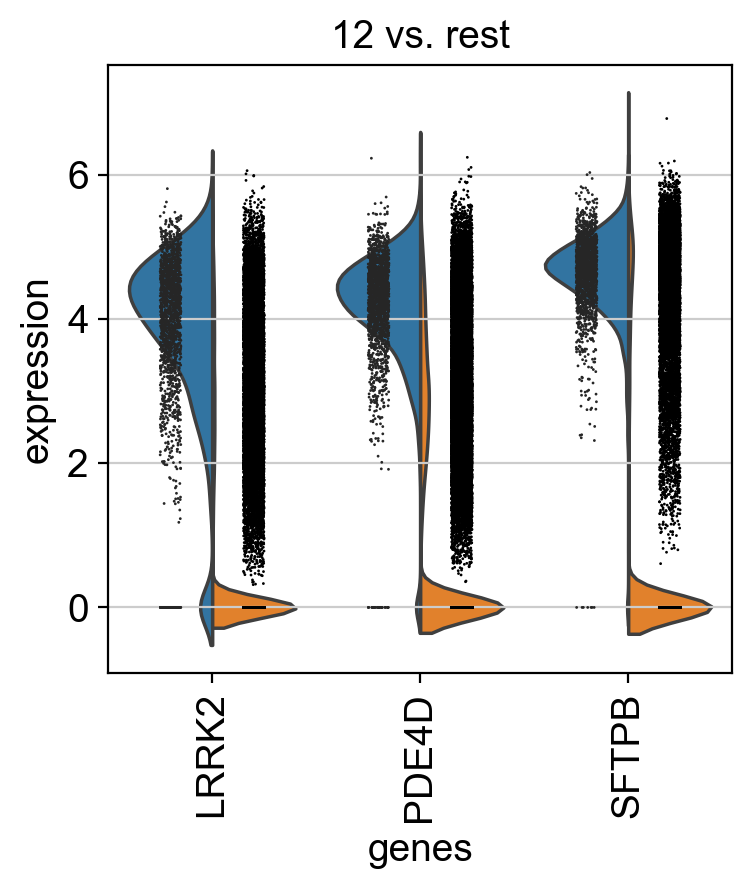

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


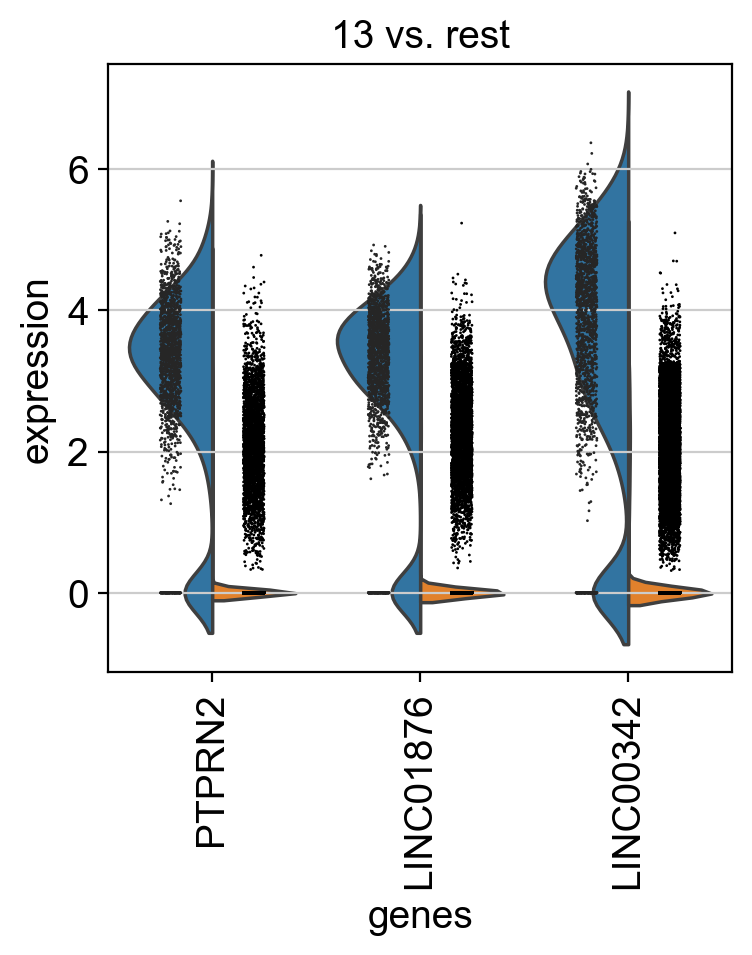

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


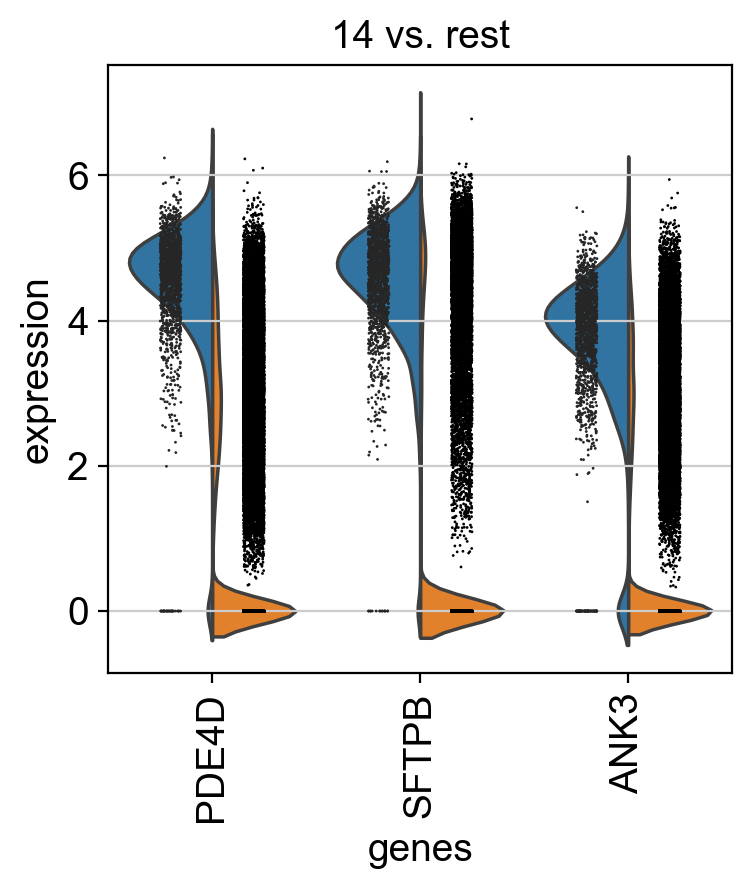

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


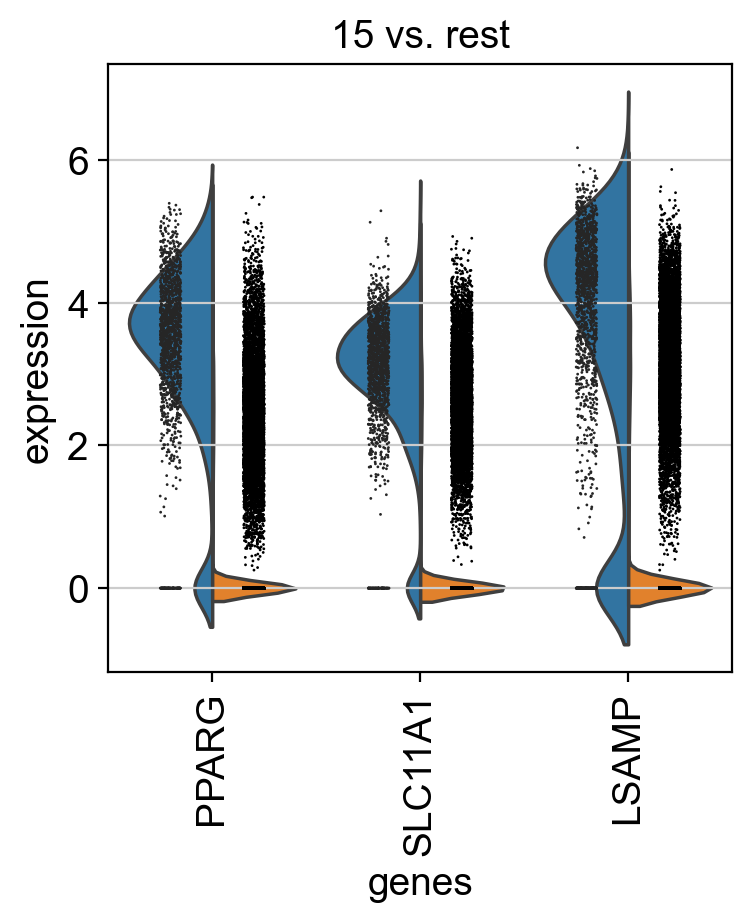

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


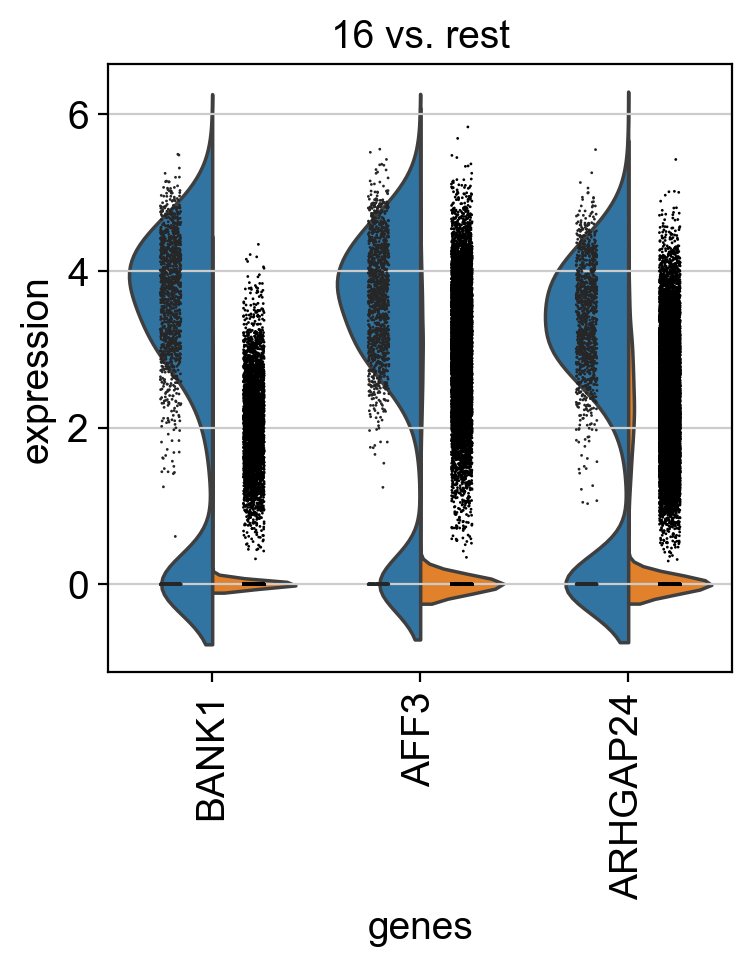

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


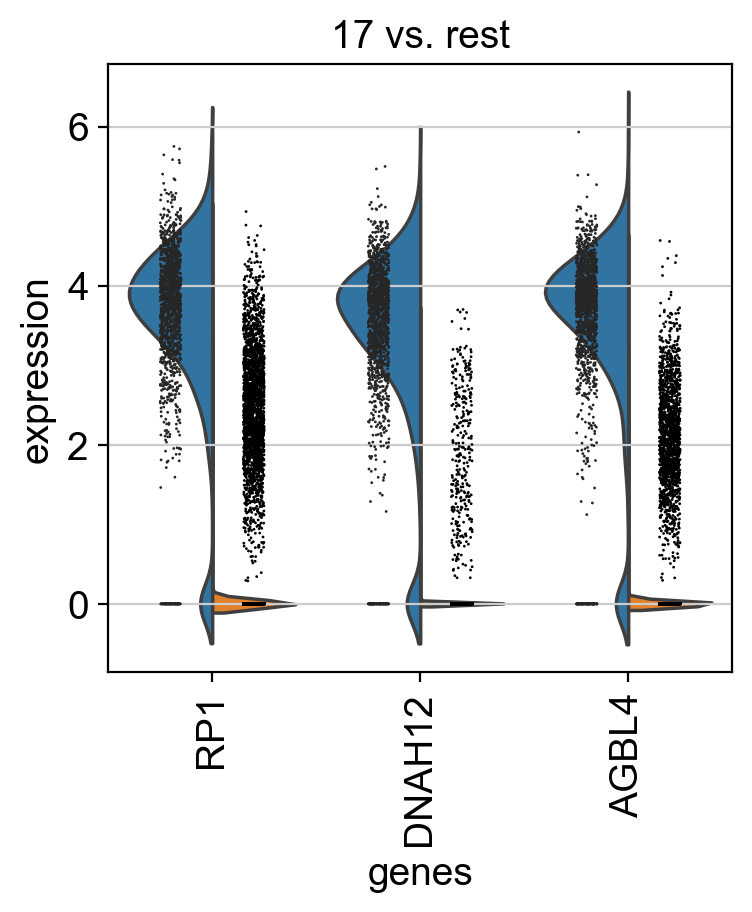

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


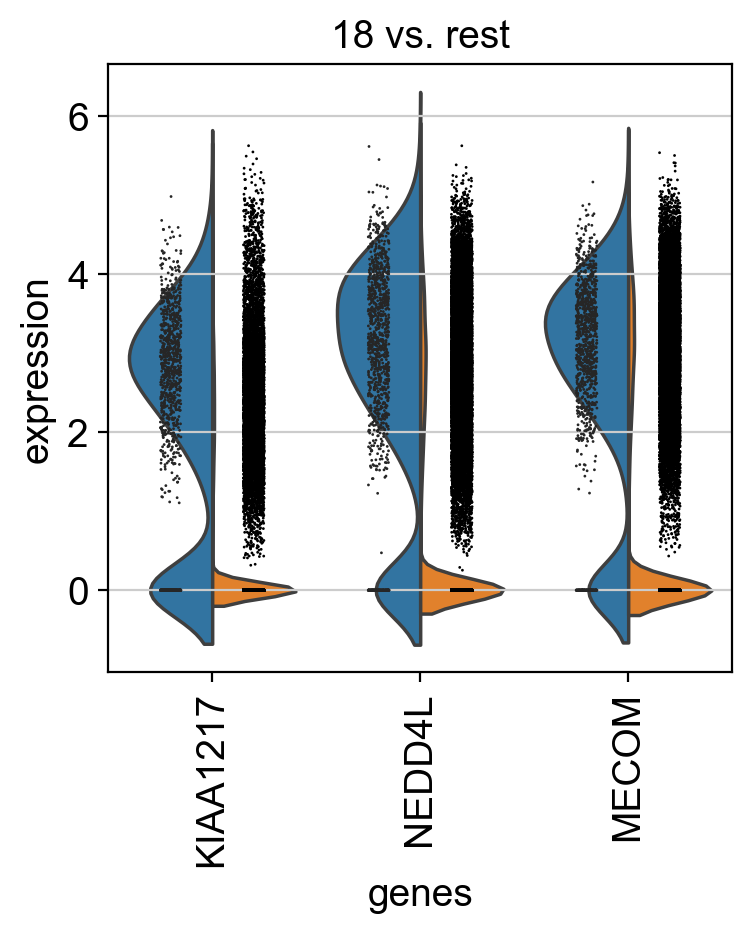

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


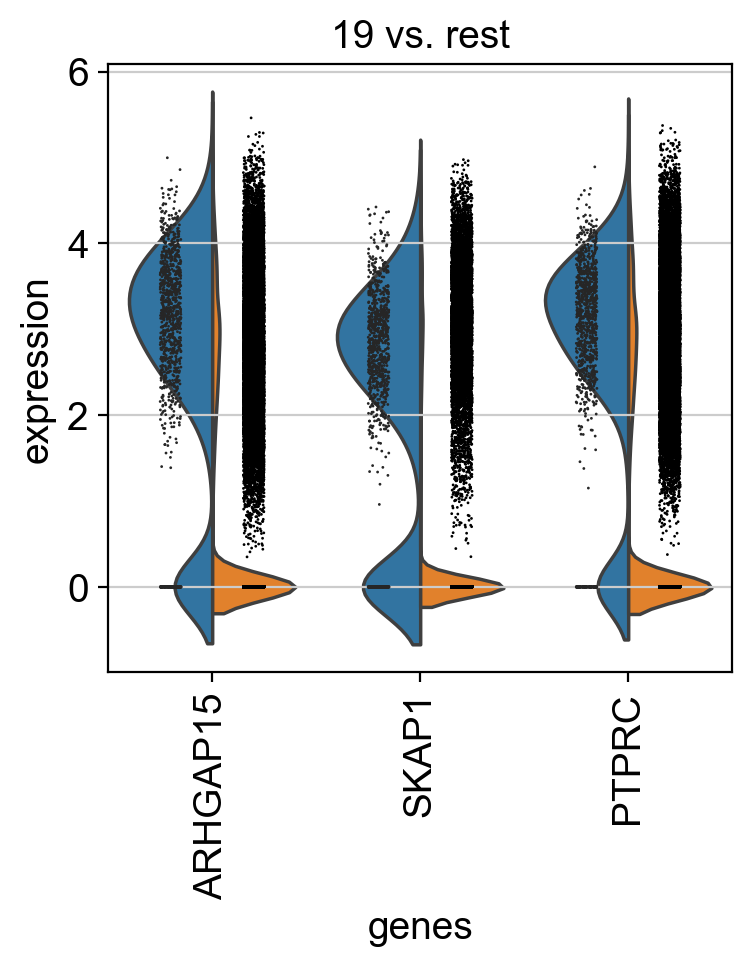

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


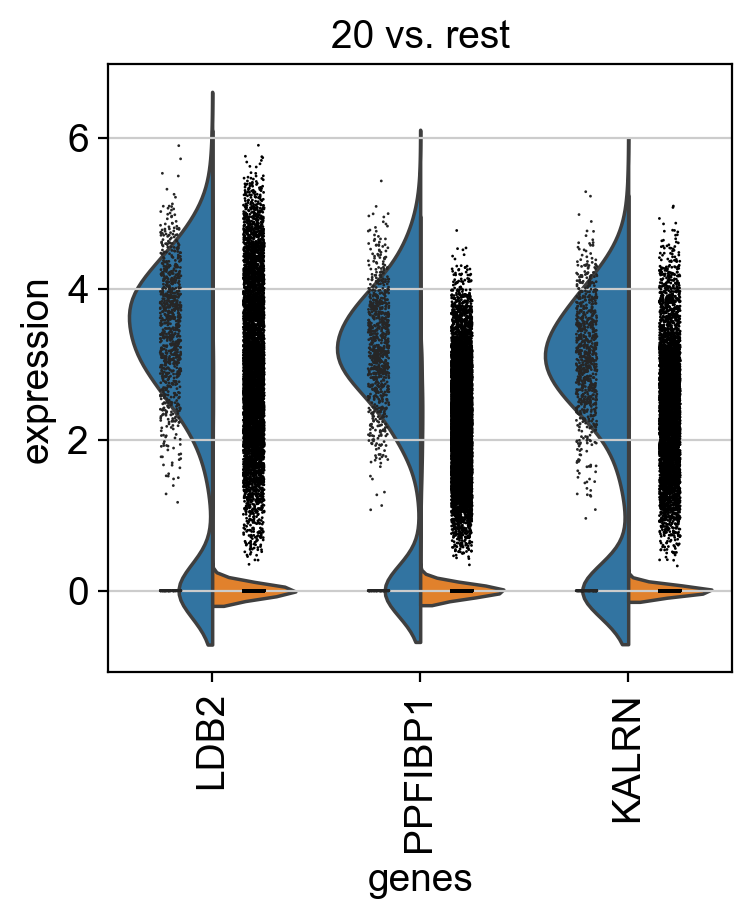

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


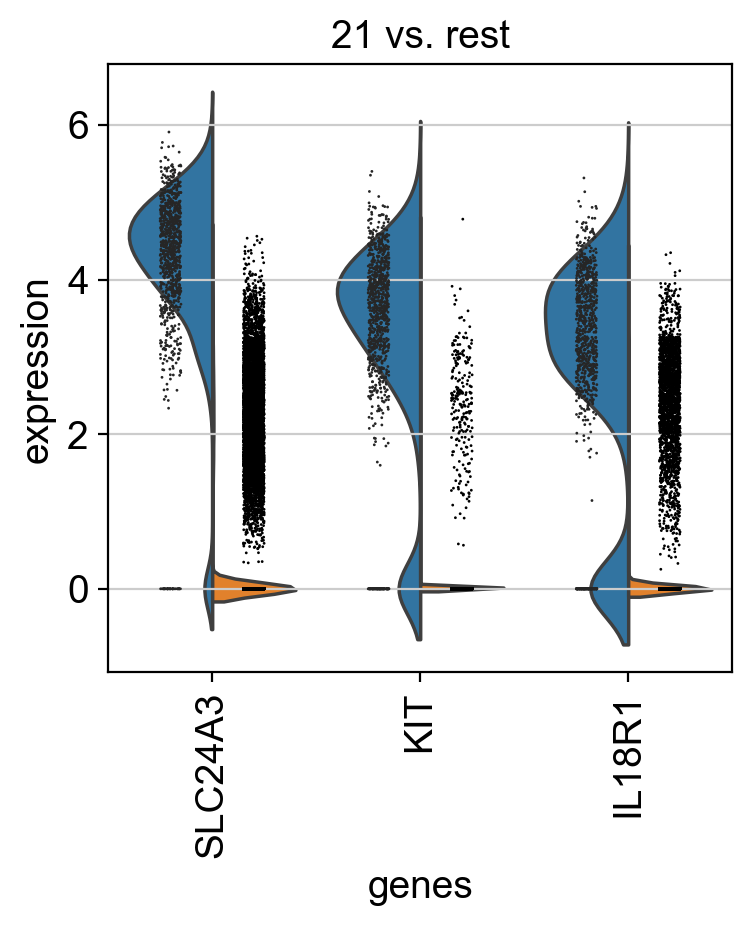

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


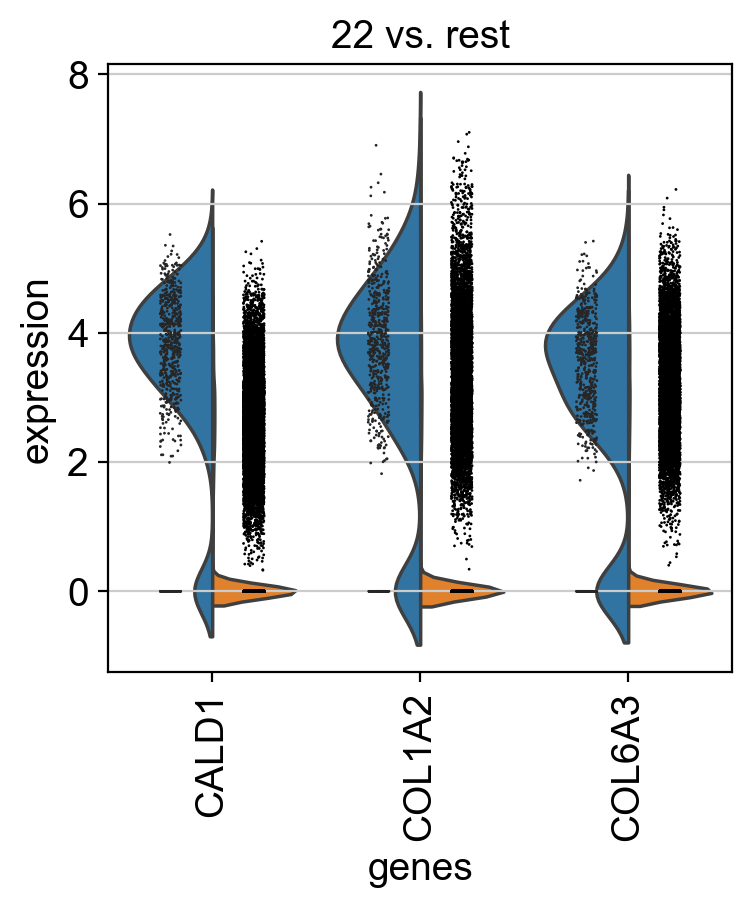

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


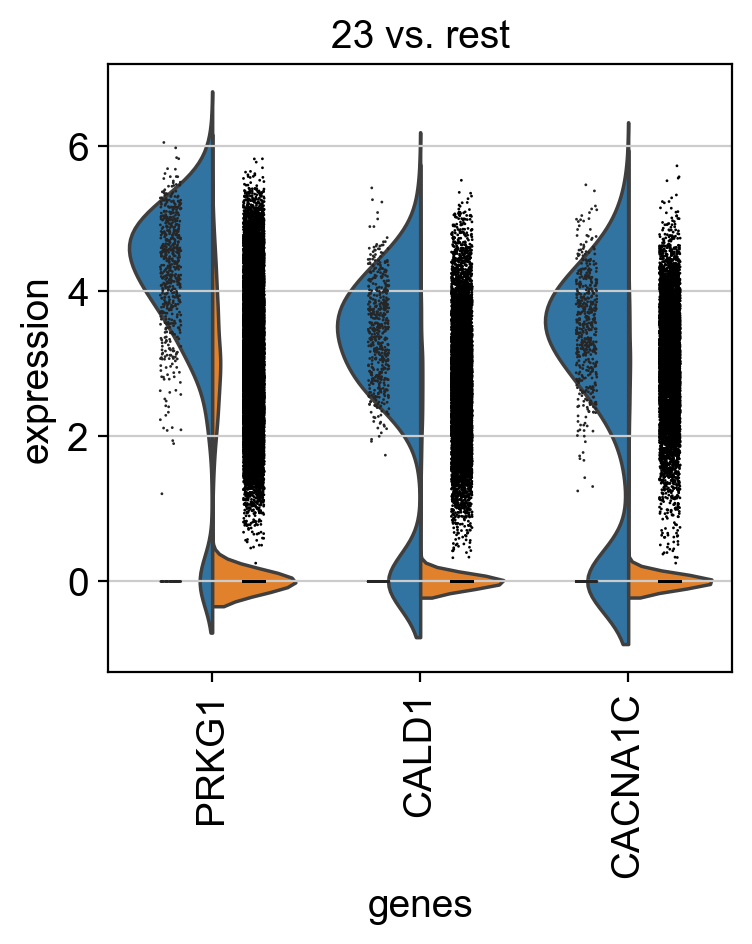

In [33]:
#Step 8: Violin plot of expression per cluster
sc.pl.rank_genes_groups_violin(adata, n_genes=3, show=True)

#### Cell Type Annotation

In [61]:
#Step 1: Summarize Top Genes per Cluster
df = sc.get.rank_genes_groups_df(adata, group=None)
df

group     names     scores  logfoldchanges         pvals     pvals_adj  \
0          0     PTPRC  94.155197        4.004817  0.000000e+00  0.000000e+00   
1          0     SKAP1  90.651794        5.442446  0.000000e+00  0.000000e+00   
2          0     PARP8  90.165565        4.182425  0.000000e+00  0.000000e+00   
3          0  ARHGAP15  89.638756        3.910859  0.000000e+00  0.000000e+00   
4          0       FYN  86.857773        4.320937  0.000000e+00  0.000000e+00   
...      ...       ...        ...             ...           ...           ...   
762067    23    CHST11 -12.381222       -2.234705  3.302775e-35  1.379908e-32   
762068    23    FAM49B -12.431334       -3.150189  1.766632e-35  7.684363e-33   
762069    23     RUNX1 -12.790763       -2.174357  1.846529e-37  9.020435e-35   
762070    23     ELMO1 -12.842248       -2.726666  9.507347e-38  4.716981e-35   
762071    23     RBM47 -13.148812       -3.846933  1.728684e-39  8.998511e-37   

        pct_nz_group  pct_nz_reference  
0           0.831567          0.267032  
1           0.718019          0.071627  
2           0.765500          0.248260  
3           0.799187          0.256952  
4           0.743284          0.169844  
...              ...               ...  
762067      0.176568          0.445899  
762068      0.070957          0.355079  
762069      0.174917          0.464224  
762070      0.112211          0.400953  
762071      0.047855          0.350126  

[762072 rows x 8 columns]

In [63]:
#Step 2:Filter top 5 genes per cluster and use their known biology to label clusters.
df_filtered = df[(df.pvals_adj < 0.05) & (df.logfoldchanges > 0.5)]
top5 = df_filtered.groupby("group").head(5)
top5.to_csv("../results/top5_markers_per_cluster.csv", index=False)

In [69]:
top5

group     names     scores  logfoldchanges          pvals  \
0          0     PTPRC  94.155197        4.004817   0.000000e+00   
1          0     SKAP1  90.651794        5.442446   0.000000e+00   
2          0     PARP8  90.165565        4.182425   0.000000e+00   
3          0  ARHGAP15  89.638756        3.910859   0.000000e+00   
4          0       FYN  86.857773        4.320937   0.000000e+00   
...      ...       ...        ...             ...            ...   
730319    23     PRKG1  34.674385        4.914657  1.916941e-263   
730320    23     CALD1  32.435009        5.124650  8.813239e-231   
730321    23   CACNA1C  30.236057        5.143410  7.957516e-201   
730322    23       LPP  27.448500        2.742694  7.240165e-166   
730323    23     RBPMS  25.275995        3.469164  5.866805e-141   

            pvals_adj  pct_nz_group  pct_nz_reference  
0        0.000000e+00      0.831567          0.267032  
1        0.000000e+00      0.718019          0.071627  
2        0.000000e+00      0.765500          0.248260  
3        0.000000e+00      0.799187          0.256952  
4        0.000000e+00      0.743284          0.169844  
...               ...           ...               ...  
730319  6.086862e-259      0.938944          0.330656  
730320  1.399234e-226      0.848185          0.149959  
730321  8.422501e-197      0.797030          0.120367  
730322  5.747424e-162      0.881188          0.584637  
730323  3.725773e-137      0.762376          0.259306  

[120 rows x 8 columns]

E:\conda_envs\scanpy-stable\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


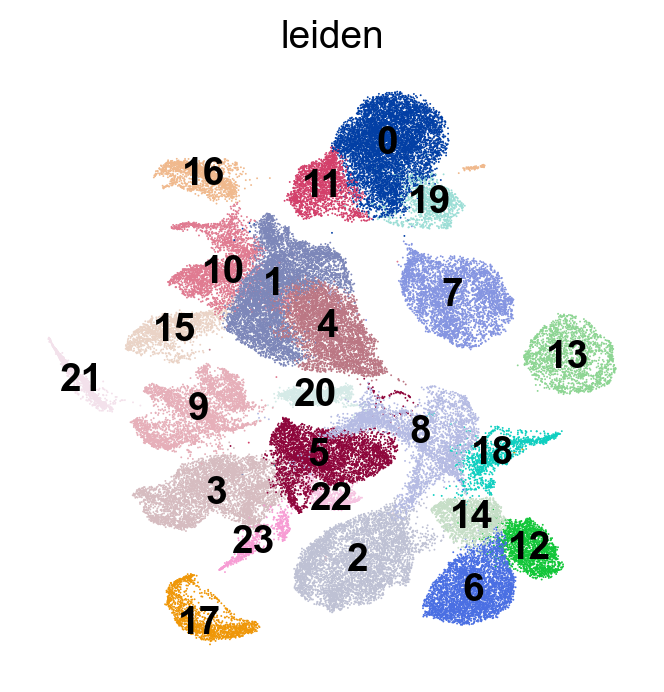

In [66]:
# Assign numbers to each clusters
sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc = "on data")